In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.offline as offline
import random
from __future__ import absolute_import, division, print_function
import re, string
from wordcloud import WordCloud

In [32]:
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Sentiment

In [6]:
sentimentDF = pd.read_csv("9th_Grade_Biology/sentimentDF.csv")

In [11]:
def plot_sentiment(sentimentDF):
    sentence_index = sentimentDF['sentence_index']
    sentiment = sentimentDF['text_blob_score']
    
    trace_sentiment = go.Scatter(
    x = sentence_index,
    y = sentiment,
    mode = 'lines+markers',
    name = 'Sentiment'
    )

    data = [trace_sentiment]
    layout=go.Layout(
        title = 'Sentiment',
        yaxis = dict(
            title='Sentiment (Positive or Negative)',
            range=[-1.25,1.25]
        )
    )

    fig = go.Figure(data=data, layout=layout)
    offline.init_notebook_mode(connected=True)
    offline.iplot(fig)

In [13]:
sentence_index = sentimentDF['sentence_index']
sentiment = sentimentDF['text_blob_score']

In [14]:
trace_sentiment = go.Scatter(
    x = sentence_index,
    y = sentiment,
    mode = 'lines+markers',
    name = 'Sentiment'
    )

In [15]:
trace_sentiment

Scatter({
    'mode': 'lines+markers',
    'name': 'Sentiment',
    'x': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
                 14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
                 28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
                 42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
                 56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
                 70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
                 84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
                 98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
                112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124]),
    'y': array([ 0.28571429,  0.        ,  0.        , -0.08333333,  0.        ,
                 0.        ,  0.        ,  0.        ,  0.5       ,  0.        ,
   

In [12]:
plot_sentiment(sentimentDF)

# Number of Unique Words

In [30]:
sentenceDF = pd.read_csv('9th_Grade_Biology/sentenceDF.csv')

In [55]:
def get_unique_words(sentenceDF):
    spkDF1 = sentenceDF[sentenceDF['speaker_label']=='spk_1']    
    spkDF0 = sentenceDF[sentenceDF['speaker_label']=='spk_0']
    spkStr1 = spkDF1['sentence'].str.cat(sep=' ')
    spkStr0 = spkDF0['sentence'].str.cat(sep=' ')
    
    # The longer one is the teacher
    if len(spkStr0) > len(spkStr1):
        teacherStr = spkStr0
    else:
        teacherStr = spkStr1 
    teacherStr = teacherStr.lower()

    # Get unique words
    teacher = re.sub('[%s]' % re.escape(string.punctuation), '', teacherStr)
    teacher_list = teacher.split(' ')
    teach_freq = dict(zip(list(np.unique(teacher_list, return_counts = True)[0]), list(np.unique(teacher_list, return_counts = True)[1])))
    teacher_unique_words = list(np.unique(teacher_list))
    
    wordcloud = WordCloud().generate(teacher)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    return teach_freq

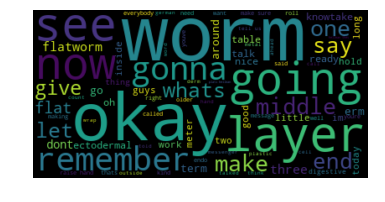

In [71]:
words_freq=get_unique_words(sentenceDF)

In [83]:
words_json = [

    {
        'text':'police',
        'weight':100
    },
    {
        'text':'parents',
        'weight':80
    }
]

In [92]:
words_json2

[{'text': '', 'weight': 165},
 {'text': 'a', 'weight': 24},
 {'text': 'aaron', 'weight': 1},
 {'text': 'about', 'weight': 18},
 {'text': 'above', 'weight': 2},
 {'text': 'act', 'weight': 2},
 {'text': 'actual', 'weight': 1},
 {'text': 'after', 'weight': 2},
 {'text': 'again', 'weight': 1},
 {'text': 'against', 'weight': 1},
 {'text': 'ahead', 'weight': 3},
 {'text': 'air', 'weight': 2},
 {'text': 'alderman', 'weight': 2},
 {'text': 'all', 'weight': 5},
 {'text': 'already', 'weight': 1},
 {'text': 'also', 'weight': 1},
 {'text': 'an', 'weight': 1},
 {'text': 'and', 'weight': 43},
 {'text': 'animals', 'weight': 1},
 {'text': 'anybody', 'weight': 1},
 {'text': 'anymore', 'weight': 1},
 {'text': 'anything', 'weight': 1},
 {'text': 'are', 'weight': 7},
 {'text': 'arians', 'weight': 1},
 {'text': 'arms', 'weight': 2},
 {'text': 'around', 'weight': 7},
 {'text': 'as', 'weight': 3},
 {'text': 'at', 'weight': 2},
 {'text': 'b', 'weight': 1},
 {'text': 'back', 'weight': 1},
 {'text': 'be', 'weig

In [97]:
type(words_json2[0])

dict

In [100]:
type(json.dumps(words_json))

str

In [101]:
json.dumps(words_json)

'[{"text": "police", "weight": 100}, {"text": "parents", "weight": 80}]'

In [99]:
str(words_json2)

"[{'text': '', 'weight': 165}, {'text': 'a', 'weight': 24}, {'text': 'aaron', 'weight': 1}, {'text': 'about', 'weight': 18}, {'text': 'above', 'weight': 2}, {'text': 'act', 'weight': 2}, {'text': 'actual', 'weight': 1}, {'text': 'after', 'weight': 2}, {'text': 'again', 'weight': 1}, {'text': 'against', 'weight': 1}, {'text': 'ahead', 'weight': 3}, {'text': 'air', 'weight': 2}, {'text': 'alderman', 'weight': 2}, {'text': 'all', 'weight': 5}, {'text': 'already', 'weight': 1}, {'text': 'also', 'weight': 1}, {'text': 'an', 'weight': 1}, {'text': 'and', 'weight': 43}, {'text': 'animals', 'weight': 1}, {'text': 'anybody', 'weight': 1}, {'text': 'anymore', 'weight': 1}, {'text': 'anything', 'weight': 1}, {'text': 'are', 'weight': 7}, {'text': 'arians', 'weight': 1}, {'text': 'arms', 'weight': 2}, {'text': 'around', 'weight': 7}, {'text': 'as', 'weight': 3}, {'text': 'at', 'weight': 2}, {'text': 'b', 'weight': 1}, {'text': 'back', 'weight': 1}, {'text': 'be', 'weight': 3}, {'text': 'because', 

In [18]:
spkDF1 = sentenceDF[sentenceDF['speaker_label'] == 'spk_1']
spkDF0 = sentenceDF[sentenceDF['speaker_label'] == 'spk_0']
spkStr1 = spkDF1['sentence'].str.cat(sep=' ')
spkStr0 = spkDF0['sentence'].str.cat(sep=' ')

# The longer one is the teacher
if len(spkStr0) > len(spkStr1):
    teacherStr = spkStr0
else:
    teacherStr = spkStr1
teacherStr = teacherStr.lower()

# Get teacher words
teacher_words = re.sub('[%s]' % re.escape(string.punctuation), '', teacherStr)
teacher_list = teacher_words.split(' ')


# split sentences into words
from nltk.tokenize import word_tokenize  # to split sentences into words
from nltk.corpus import stopwords

words = word_tokenize(teacherStr)

# get stopwords
stop_words = set(stopwords.words('english'))

# remove stopwords from our words list and also remove any word whose length is less than 3
# stopwords are commonly occuring words like is, am, are, they, some, etc.
words_to_vis = [word for word in words if word not in stop_words and len(word) > 3]



from collections import Counter
words_freq_vis = Counter(words_to_vis)
words_json_vis = [{'text': word, 'weight': count} for word, count in words_freq_vis.items()]

words_to_count = Counter(words)



In [12]:
len(teacher_unique_words)

430

In [13]:
len(words_json)

430

In [19]:
len(words_json2)

283

In [20]:
words

['remember',
 'talked',
 'sponges',
 'remembers',
 'said',
 'sponges',
 'guys',
 'class',
 'know',
 'water',
 'goes',
 'half',
 'water',
 'goes',
 'okay',
 'also',
 'talked',
 'midair',
 'okay',
 'remember',
 'dairy',
 'teach',
 'remember',
 'dairy',
 'ines',
 'polyps',
 'ahead',
 'remember',
 'tell',
 'else',
 'middle',
 'tentacles',
 'scallops',
 'raise',
 'hands',
 'gracia',
 'tentacles',
 'wave',
 'like',
 'care',
 'polyps',
 'rooms',
 'yeah',
 'okay',
 'today',
 'going',
 'talk',
 'next',
 'file',
 'talk',
 'remembers',
 'molluscs',
 'heard',
 'someone',
 'terrians',
 'talked',
 'already',
 'grasping',
 'straws',
 'talk',
 'worms',
 'today',
 'talk',
 'worms',
 'nice',
 'loud',
 'okay',
 'raise',
 'hand',
 'ever',
 'held',
 'worm',
 'hands',
 'raise',
 'hand',
 'ever',
 'seen',
 'worms',
 'rain',
 'guys',
 'know',
 'worms',
 'raise',
 'hand',
 'ever',
 'eaten',
 'worms',
 'words',
 'kind',
 'okay',
 'gummy',
 'berms',
 'count',
 'right',
 'remember',
 'group',
 'work',
 'little',


In [25]:
def get_word_count(sentenceDF):
    spkDF1 = sentenceDF[sentenceDF['speaker_label'] == 'spk_1']
    spkDF0 = sentenceDF[sentenceDF['speaker_label'] == 'spk_0']
    spkStr1 = spkDF1['sentence'].str.cat(sep=' ')
    spkStr0 = spkDF0['sentence'].str.cat(sep=' ')

    # The longer one is the teacher
    if len(spkStr0) > len(spkStr1):
        teacherStr = spkStr0
    else:
        teacherStr = spkStr1
    teacherStr = teacherStr.lower()

    # Get teacher words
    words = word_tokenize(teacherStr)
    words_to_count = Counter(words)
    return (words_to_count)

In [32]:
len(s.items())

426

In [29]:
def get_word_count(sentenceDF):
    spkDF1 = sentenceDF[sentenceDF['speaker_label'] == 'spk_1']
    spkDF0 = sentenceDF[sentenceDF['speaker_label'] == 'spk_0']
    spkStr1 = spkDF1['sentence'].str.cat(sep=' ')
    spkStr0 = spkDF0['sentence'].str.cat(sep=' ')

    # The longer one is the teacher
    if len(spkStr0) > len(spkStr1):
        teacherStr = spkStr0
    else:
        teacherStr = spkStr1
    teacherStr = teacherStr.lower()

    # Get teacher words
    words = word_tokenize(teacherStr)
    teach_freq = dict(
        zip(list(np.unique(words, return_counts=True)[0]), list(np.unique(words, return_counts=True)[1])))
    teacher_unique_words = list(np.unique(teacher_list))
    return len(teacher_unique_words)

In [30]:
get_word_count(sentenceDF)

430

In [34]:
s=get_word_count(sentenceDF)

In [50]:
def get_teacher(sentenceDF):
    """
    Helper function to decide who is the teacher
    The longer string is the teacher
    :param sentenceDF: dataframe of all sentences
    :return: list of teacher's words, speaker tag of teacher
    """
    spkDF1 = sentenceDF[sentenceDF['speaker_label'] == 'spk_1']
    spkDF0 = sentenceDF[sentenceDF['speaker_label'] == 'spk_0']
    spkStr1 = spkDF1['sentence'].str.cat(sep=' ')
    spkStr0 = spkDF0['sentence'].str.cat(sep=' ')

    if len(spkStr0) > len(spkStr1):
        teacherStr = spkStr0
        teacher = 'spk_0'
    else:
        teacherStr = spkStr1
        teacher = 'spk_1'
    teacherStr = teacherStr.lower()
    teacher_words = word_tokenize(teacherStr)
    return teacher_words, teacher

In [51]:
teacher_words, teacher = get_teacher(sentenceDF)
teacherDF = sentenceDF[sentenceDF['speaker_label'] == teacher]
teacherDF['spk_time'] = teacherDF['end_time'] - teacherDF['start_time']
len_in_min = teacherDF['spk_time'].sum() / 60
teacher_words_spoken_per_min = len(teacher_words)/len_in_min


C:\Users\sjlee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [52]:
teacher_words_spoken_per_min

161.8442964196504

In [53]:
len_in_min

11.529599999999993

In [54]:
teacher_words

['remember',
 ',',
 'we',
 'talked',
 'about',
 'sponges',
 'who',
 'remembers',
 'what',
 'we',
 'said',
 'about',
 'the',
 'way',
 'sponges',
 'eat',
 '.',
 'i',
 "'m",
 'gon',
 'na',
 'get',
 'you',
 'guys',
 'to',
 'it',
 'as',
 'a',
 'class',
 '.',
 'we',
 'know',
 'that',
 'they',
 'the',
 'water',
 'goes',
 'only',
 'see',
 'half',
 'of',
 'you',
 'doing',
 'it',
 '.',
 'let',
 "'s",
 'do',
 'that',
 '.',
 'the',
 'water',
 'goes',
 'teo',
 'for',
 'you',
 '.',
 'okay',
 '.',
 'we',
 'also',
 'talked',
 'about',
 'midair',
 'ian',
 "'s",
 '.',
 'okay',
 ',',
 'remember',
 'the',
 'dairy',
 'ins',
 '?',
 'what',
 'did',
 'i',
 'teach',
 'you',
 'to',
 'remember',
 'the',
 'dairy',
 'ines',
 ',',
 'how',
 'did',
 'they',
 'act',
 '?',
 'no',
 'polyps',
 'act',
 '.',
 'go',
 'ahead',
 'and',
 'do',
 'it',
 '.',
 'i',
 'do',
 "n't",
 '.',
 'you',
 'remember',
 'tell',
 'us',
 'that',
 'and',
 'what',
 'else',
 'in',
 'the',
 'middle',
 'of',
 'tentacles',
 '.',
 'let',
 'me',
 'see'

In [40]:
t = sentenceDF[sentenceDF['speaker_label'] == spk]

In [42]:
t.head()

,punct_index,speaker_label,start_time,end_time,sentence
1,1,spk_0,7.521,12.851,"Remember , we talked about sponges who remembe..."
2,2,spk_0,13.441,15.181,I'm gonna get you guys to it as a class .
3,3,spk_0,15.191,22.721,We know that they the water goes only see half...
5,4,spk_0,22.721,23.341,Let's do that .
6,5,spk_0,23.421,28.541,The water goes teo for you .


In [43]:
sentenceDF['spk_time'] = sentenceDF['end_time'] - sentenceDF['start_time']

In [44]:
sentenceDF['spk_time'].sum()

1075.379

In [38]:
sentenceDF.head()

,punct_index,speaker_label,start_time,end_time,sentence
0,0,spk_1,7.141,7.521,All right .
1,1,spk_0,7.521,12.851,"Remember , we talked about sponges who remembe..."
2,2,spk_0,13.441,15.181,I'm gonna get you guys to it as a class .
3,3,spk_0,15.191,22.721,We know that they the water goes only see half...
4,3,spk_1,19.341,21.361,i


In [72]:
# trace = go.Bar(
#     x = [int(round(teacher_words_spoken_per_min,0))],
#     y = [0],
#     name='You',
#     text='You',
#     orientation='h'
# )

trace_ = go.Bar(
    x = [200],
    y = [0],
    name='All teachers',
    text='All teachers',
    orientation='h'
)

layout_1=go.Layout(
    barmode='stack',
    title = 'Words Spoken per Minute',
    xaxis = dict(
        range=[0,200],
        showline=True,
        showgrid=False,
        title='Number of words'
    ),
    yaxis = dict(
        range=[-1,1],
        showgrid=False,
        showline=False,
        showticklabels=False,
        ),

    annotations=[
        dict(
            x=int(round(teacher_words_spoken_per_min,0)),
            y=.4,
            xref='x',
            yref='y',
            text='You speak {} words per minute'.format(round(teacher_words_spoken_per_min)),
            showarrow=True,
            arrowhead=7,
            ax=0,
            ay=-40
        ),
        dict(
            x=150,
            y=-.4,
            xref='x',
            yref='y',
            text='This is the average rate of speaking.',
            showarrow=True,
            arrowhead=7,
            ax=0,
            ay=40
        )
    ]
)

data_1 = [trace_] 

fig = go.Figure(data=data_1, layout=layout_1)
offline.init_notebook_mode(connected=True)
offline.iplot(fig)

In [29]:
def get_teacher(sentenceDF):
    """
    Helper function to decide who is the teacher
    The longer string is the teacher
    :param sentenceDF: dataframe of all sentences
    :return: list of teacher's words, speaker tag of teacher
    """
    spkDF1 = sentenceDF[sentenceDF['speaker_label'] == 'spk_1']
    spkDF0 = sentenceDF[sentenceDF['speaker_label'] == 'spk_0']
    spkStr1 = spkDF1['sentence'].str.cat(sep=' ')
    spkStr0 = spkDF0['sentence'].str.cat(sep=' ')

    if len(spkStr0) > len(spkStr1):
        teacherStr = spkStr0
        teacher = 'spk_0'
    else:
        teacherStr = spkStr1
        teacher = 'spk_1'
    teacherStr = teacherStr.lower()
    teacher_words = word_tokenize(teacherStr)
    return teacher_words, teacher


def get_words_for_cloud(sentenceDF):
    """
    Processes sentences for word cloud
    :param sentenceDF: dataframe of all sentences
    :return: json of word counts
    """
    teacher_words, _ = get_teacher(sentenceDF)
    stop_words = set(stopwords.words('english'))

    # Remove stopwords from our words list and also remove any word whose length is less than 3
    words_to_vis = [word for word in teacher_words if word not in stop_words and len(word) > 3]

    # Words to visualize (only frequent ones) and count (all)
    words_freq_vis = Counter(words_to_vis)
    words_json_vis = [{'text': word, 'weight': count} for word, count in words_freq_vis.items()]
    return json.dumps(words_json_vis)


def get_word_count(sentenceDF):
    """
    Processes sentences to count unique words
    :param sentenceDF: dataframe of all sentences
    :return: integer of number of unique words used
    """
    teacher_words, _ = get_teacher(sentenceDF)
    words_to_count = Counter(teacher_words)
    return len(words_to_count.items())

In [33]:
num_words = get_word_count(sentenceDF)

In [34]:
num_words

426

In [26]:
import pickle as pkl

In [27]:
with open('9th_Grade_Biology/jargon_tf.pkl', 'rb') as f:
    j = pkl.load(f)

In [43]:
sorted(j, key=j.__getitem__, reverse=True)[:10]

['worms',
 'say',
 'flat',
 'worm',
 'said',
 'tentacles',
 'sponges',
 'spell',
 'board',
 'bit']

{'say': 0.012779552715654952,
 'breaking': 0.0010649627263045794,
 'spell': 0.002129925452609159,
 'board': 0.002129925452609159,
 'real': 0.0010649627263045794,
 'worm': 0.007454739084132056,
 'flat': 0.011714589989350373,
 'bit': 0.002129925452609159,
 'h': 0.0010649627263045794,
 'n': 0.0010649627263045794,
 'hole': 0.002129925452609159,
 'flatter': 0.0010649627263045794,
 'system': 0.002129925452609159,
 'blasting': 0.0010649627263045794,
 'said': 0.004259850905218318,
 'smokes': 0.0010649627263045794,
 'flatten': 0.0010649627263045794,
 'tentacles': 0.003194888178913738,
 'worms': 0.025559105431309903,
 'sponges': 0.003194888178913738}

In [53]:
def get_jargon():
    import pickle as pkl
    with open('9th_Grade_Biology/jargon_tf.pkl', 'rb') as f:
        jargon = pkl.load(f)
    top_ten = sorted(jargon, key=jargon.__getitem__, reverse=True)[:10]
    return len(jargon), top_ten

In [54]:
# ideally we will count the number of jargon words and regular words and then convert them into 
# percents for the stacked bar chart below.
jargon, top_ten = get_jargon()
regular = get_word_count(sentenceDF)
annotations=[
        dict(
            x=.5,
            y=regular,
            xref='x',
            yref='y',
            text='Top 10 Jargon Words Used',
            showarrow=False
        )]

In [55]:
increment = regular/11
for i, jword in enumerate(top_ten):
    jword_anno = dict(
            x=.5,
            y=regular - (increment * (i+1)),
            xref='x',
            yref='y',
            text='{}. {}'.format(str(i+1), jword),
            showarrow=False
        )
    annotations.append(jword_anno)

In [56]:
trace0 = go.Bar(
    x = [0],
    y = [jargon],
    name = 'Jargon',
    width=.5,
    marker=go.bar.Marker(
        color='rgb(255,45,15)'
    )
)

trace1 = go.Bar(
    x = [0],
    y = [regular],
    name = 'Regular',
    width=.5,
    marker=dict(
        color='rgb(0, 59, 174)'
    )
)



data = [trace0, trace1]
layout = go.Layout(
    title = 'Percent of Jargon Words',
    barmode = 'stack',
    xaxis = dict(
        range=[0,.7],
        ticks='',
        showticklabels = False,
        showgrid = False
    ),
    yaxis = dict(
        ticks='',
        showticklabels = True,
        showgrid = False
    ),
    
    annotations=annotations
#     annotations=[
#         dict(
#             x=.5,
#             y=450,
#             xref='x',
#             yref='y',
#             text='Top 10 Jargon Words Used',
#             showarrow=False
#         ), 
#         dict(
#             x=.5,
#             y=82,
#             xref='x',
#             yref='y',
#             text='1. Jargon Word 1',
#             showarrow=False
#         ),
#         dict(
#             x=.5,
#             y=74,
#             xref='x',
#             yref='y',
#             text='2. Jargon Word 2',
#             showarrow=False
#         ),
#         dict(
#             x=.5,
#             y=66,
#             xref='x',
#             yref='y',
#             text='3. Jargon Word 3',
#             showarrow=False
#         ),
#         dict(
#             x=.5,
#             y=58,
#             xref='x',
#             yref='y',
#             text='4. Jargon Word 4',
#             showarrow=False
#         ),
#         dict(
#             x=.5,
#             y=50,
#             xref='x',
#             yref='y',
#             text='5. Jargon Word 5',
#             showarrow=False
#         ),
#         dict(
#             x=.5,
#             y=42,
#             xref='x',
#             yref='y',
#             text='6. Jargon Word 6',
#             showarrow=False
#         ),
#         dict(
#             x=.5,
#             y=34,
#             xref='x',
#             yref='y',
#             text='7. Jargon Word 7',
#             showarrow=False
#         ),
#         dict(
#             x=.5,
#             y=26,
#             xref='x',
#             yref='y',
#             text='8. Jargon Word 8',
#             showarrow=False
#         ),
#         dict(
#             x=.5,
#             y=18,
#             xref='x',
#             yref='y',
#             text='9. Jargon Word 9',
#             showarrow=False
#         ),
#         dict(
#             x=.5,
#             y=10,
#             xref='x',
#             yref='y',
#             text='10. Jargon Word 10',
#             showarrow=False
#         )
#     ]
)

fig = go.Figure(data=data, layout=layout)
offline.init_notebook_mode(connected=True)
offline.iplot(fig)